#Exercício de Fixação de Conceitos 3

Lucas Costa e Lima - 182411

Enéias Flório Ramos Júnior - 170486 

## Parte 1 - Revisitando o algoritmo de retropropagação do erro



Queremos encontrar $\frac{\partial J}{\partial v_{21}}$. 

Portanto queremos achar a expressão descrita por

$$\frac{\partial J}{\partial v_{21}} = \frac{\partial J}{\partial e_1} \frac{\partial e_1}{\partial y^2_1 }  \frac{\partial y^2_1}{\partial y^1_2} \frac{\partial y^1_2}{\partial u^1_2} \frac{\partial u^1_2}{\partial v_{21}} + \frac{\partial J}{\partial e_2} \frac{\partial e_2}{\partial y^2_2 }  \frac{\partial y^2_2}{\partial y^1_2} \frac{\partial y^1_2}{\partial u^1_2} \frac{\partial u^1_2}{\partial v_{21}} $$


Sabemos que $J(.) = e^2_1 + e^2_2$ e que $e_1 = d_1 - y^2_1$ e também que $e_2 = d_2 - y^2_2$.

Assim temos que

$\frac{\partial J}{\partial e_1} = 2e_1$ , $\frac{\partial J}{\partial e_2} = 2e_2$,  $\frac{\partial e_1}{\partial y_1^2} = -1$, $\frac{\partial e_2}{\partial y_2^2} = -1$, $\frac{\partial y_1^2}{\partial y_2^1} = w_{20}$, $\frac{\partial y_2^2}{\partial y_2^1} = w_{21}$, $\frac{\partial y_2^1}{\partial u_2^1} = f'(^.)$, $\frac{\partial u_2^1}{\partial v_{21}} = x_2$


Substituindo, temos

$$\frac{\partial J}{\partial v_{21}} = -2e_1 w_{20} f'(^.) x_2 - 2e_2 w_{21} f'(^.) x_2 = -2(d_1 - y_1^2) w_{20} f'(^.)x_2 -2(d_2 - y_2^2) w_{21} f'(^.)x_2 $$

$$\frac{\partial J}{\partial v_{21}} = -2 f'(^.) x_2 [(d_1 - y_1^2) w_{20} + (d_2 - y_2^2) w_{21} ]$$



## Parte 2 - Classificação binária com redes MLP e SVMs




**Importantes comentários acerca do EFC**

Este EFC foi feio no *Google Colab*, portanto exige que, caso os corretores queiram executar o código, mudem a parte referente ao acesso aos dados. Fizemos inúmeros testes com diversas possibilidades de arquiteturas das redes e com os valores de C no EFC, inclusive indo além das demandas do exercício, por exemplo, com MLP's de mais de uma camada intermediária, mas retratamos aqui apenas o o que julgamos essencial para um exercício sucinto. Muitas funções de plot das matrizes de confusão e das *decision boundaries* foram adaptadas de funções que vimos no *stackoverflow* e em blogs. 

### Importação de bibliotecas e instalação da mat4py

In [0]:
!pip3 install mat4py

In [0]:
import keras
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import scipy.io as spio
from mat4py import loadmat 
np.random.seed(816)

### Importação e separação dos dados

In [0]:
test = loadmat('dados_teste.mat')
val = loadmat('dados_val.mat')
train = loadmat('dados_treinamento.mat')

In [0]:
print(test)

{'Xt': [[0.27602835211172966, 0.0], [1.0320817108612819, 0.27602835211172966], [0.8683711334501512, 1.0320817108612819], [-0.9984029319607898, 0.8683711334501512], [-1.5838929198009946, -0.9984029319607898], [-0.3512333362348963, -1.5838929198009946], [0.8606577476309493, -0.3512333362348963], [1.0317581675399567, 0.8606577476309493], [-0.3824149018939821, 1.0317581675399567], [0.027856716408180382, -0.3824149018939821], [-1.1822128440860153, 0.027856716408180382], [-0.4967484625844703, -1.1822128440860153], [1.3782497953115902, -0.4967484625844703], [1.5059825247567915, 1.3782497953115902], [0.8237694275753371, 1.5059825247567915], [-0.6361719588666523, 0.8237694275753371], [-1.4371949713221122, -0.6361719588666523], [-1.125062834108646, -1.4371949713221122], [-1.4360833930961927, -1.125062834108646], [0.008620588673936003, -1.4360833930961927], [1.075436845083586, 0.008620588673936003], [0.4419051012280892, 1.075436845083586], [-0.170892182884618, 0.4419051012280892], [0.787584214824

In [0]:
X_train = train['X']
X_val = val['Xval']
X_test = test['Xt']

y_train = train['y']
y_val = val['yval']
y_test = test['yt']

In [0]:
X_tr = np.column_stack((X_train)).T
X_v = np.column_stack((X_val)).T
X_te = np.column_stack((X_test)).T

In [0]:
y_tr = np.concatenate((y_train))
y_v = np.concatenate((y_val))
y_te = np.concatenate((y_test))

### a) Criação de um MLP 

#### Criação do nosso modelo utilizando o *Keras*

O nosso modelo é um modelo MLP de 3 camadas intermediárias, utilizamos *ReLu* como função de ativação porque, após vários testes, ela foi a função de ativação que gerou melhores resultados sobre os conjuntos de dados.

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

model = Sequential()
model.add(Dense(32, input_dim=2, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='tanh'))


In [0]:
#compiling the model

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
history = model.fit(X_tr, y_tr, validation_data=(X_v, y_v), epochs=3000, batch_size=128, verbose=1)

Train on 1000 samples, validate on 1000 samples
Epoch 1/3000
1000/1000 [==============================] - 1s 698us/step - loss: -0.7759 - acc: 0.0540 - val_loss: -1.1308 - val_acc: 0.0000e+00
Epoch 2/3000
1000/1000 [==============================] - 0s 29us/step - loss: -1.1326 - acc: 0.0870 - val_loss: -1.0976 - val_acc: 0.0050
Epoch 3/3000
1000/1000 [==============================] - 0s 30us/step - loss: -1.0558 - acc: 0.1000 - val_loss: -1.2514 - val_acc: 0.0680
Epoch 4/3000
1000/1000 [==============================] - 0s 34us/step - loss: -1.5046 - acc: 0.1110 - val_loss: -1.2632 - val_acc: 0.1060
Epoch 5/3000
1000/1000 [==============================] - 0s 36us/step - loss: -1.4365 - acc: 0.1310 - val_loss: -1.4250 - val_acc: 0.1100
Epoch 6/3000
1000/1000 [==============================] - 0s 28us/step - loss: -1.3651 - acc: 0.1230 - val_loss: -1.3558 - val_acc: 0.1030
Epoch 7/3000
1000/1000 [==============================] - 0s 30us/step - loss: -1.6565 - acc: 0.1460 - val_loss: 

In [0]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

In [0]:
score = model.evaluate(X_te, y_te, batch_size=128, verbose=1)

1000/1000 [==============================] - 0s 13us/step


In [0]:
print(history.params)

{'batch_size': 128, 'epochs': 3000, 'steps': None, 'samples': 1000, 'verbose': 1, 'do_validation': True, 'metrics': ['loss', 'acc', 'val_loss', 'val_acc']}


#### *Plot* dos gráficos de custo, acurácia sobre os dados de teste e treino e *decision boundaries*

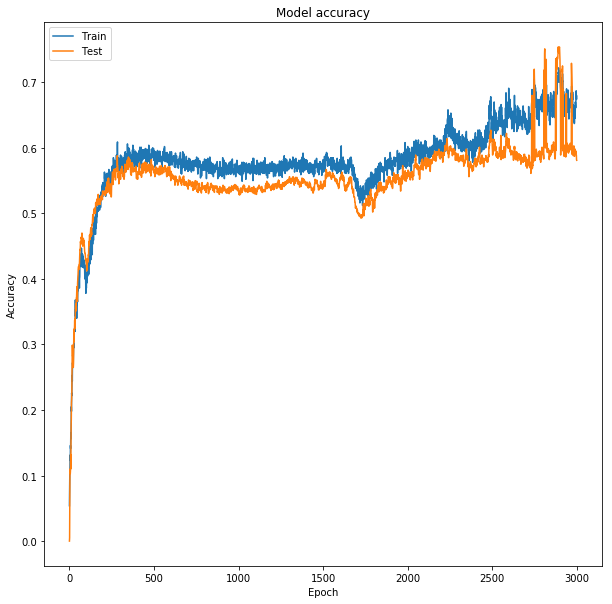

In [0]:
# Plot training & validation accuracy values
plt.figure(figsize=(10,10))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

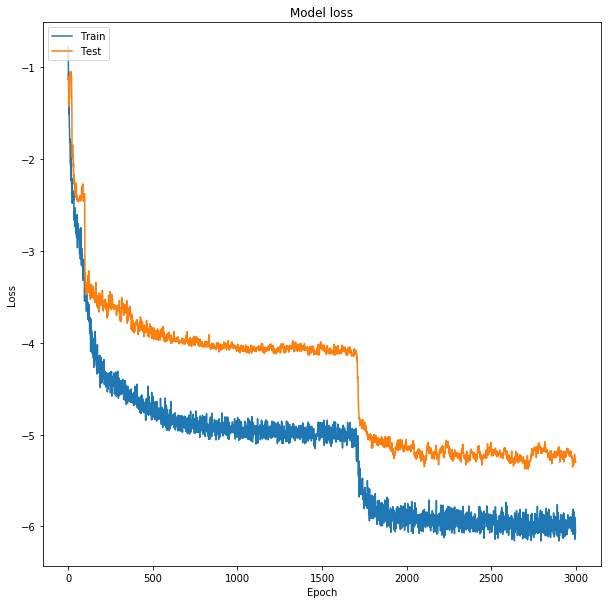

In [0]:
# Plot training & validation loss values
plt.figure(figsize=(10,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#### Comentários sobre os nossos gráficos e resultados

Observamos que o modelo evolui bem com relação a acurácia, entretanto ele performa de forma bastante oscilante após 2500 iterações, onde temos varjações bruscas nos dados de treinoe e validação.

### b) *Plot* das *decision boundaries*

In [0]:
def plot_decision_boundary(X, y, model, steps=1000, cmap='Paired'):
    """
    Function to plot the decision boundary and data points of a model.
    Data points are colored based on their actual label.
    """
    cmap = plt.get_cmap(cmap)
    
    
    # Define region of interest by data limits
    xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
    ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1
    steps = 1000
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    # Make predictions across region of interest
    labels = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Plot decision boundary in region of interest
    z = labels.reshape(xx.shape)
    
    fig, ax = plt.subplots()
    ax.contourf(xx, yy, z, cmap=cmap, alpha=0.5)

    # Get predicted labels on training data and plot
    train_labels = model.predict(X)
    plt.figure(figsize=(10,10))
    ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap, lw=0, s=20)
    
    return fig, ax

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f530622d940>)

<Figure size 720x720 with 0 Axes>

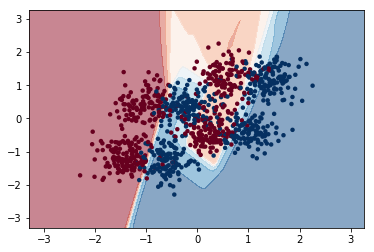

<Figure size 720x720 with 0 Axes>

In [0]:
plt.figure(figsize=(10,10))
plot_decision_boundary(X_tr, y_tr, model, cmap='RdBu')

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5305e31b00>)

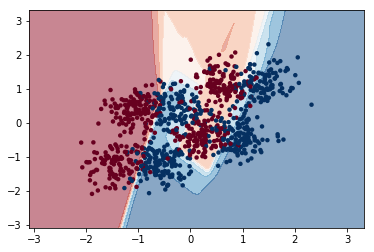

<Figure size 720x720 with 0 Axes>

In [0]:
plot_decision_boundary(X_te, y_te, model, cmap='RdBu')

#### Comentário acerca da região de decisão do MLP

É notório que para o MLP as decisões mais tranquilas acerca da decisão estão distantes das bordas, mas em regiões onde há uma distribuição grande de dados de diferentes classes, o MLP tem mais dificuldade de decidir entre as classes.

### c) Avaliação do modelo com o *dataset* de teste

In [0]:
y_pred = model.predict(X_te, verbose=0)
pred = np.zeros((y_pred.shape))

mask_1 = y_pred > 0
mask_2 = y_pred < 0

pred[mask_1] = 1
pred[mask_2] = -1

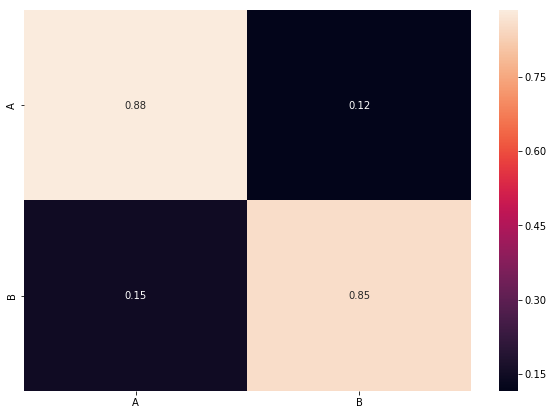

In [0]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

confusion = confusion_matrix(y_te, pred)

df_cm = pd.DataFrame(confusion, index = [i for i in "AB"],
                  columns = [i for i in "AB"])

df_cm_norm = df_cm/df_cm.sum(axis=1)

plt.figure(figsize = (10,7))
sn.heatmap(df_cm_norm, annot=True)

### d) Modificando o número de neurônios das camadas intermediárias

In [0]:
model2 = Sequential()
model2.add(Dense(32, input_dim=2, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(8, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(1, activation='tanh'))

#compiling the model

model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history2 = model2.fit(X_tr, y_tr, validation_data=(X_v, y_v), epochs=3000, batch_size=128, verbose=0)

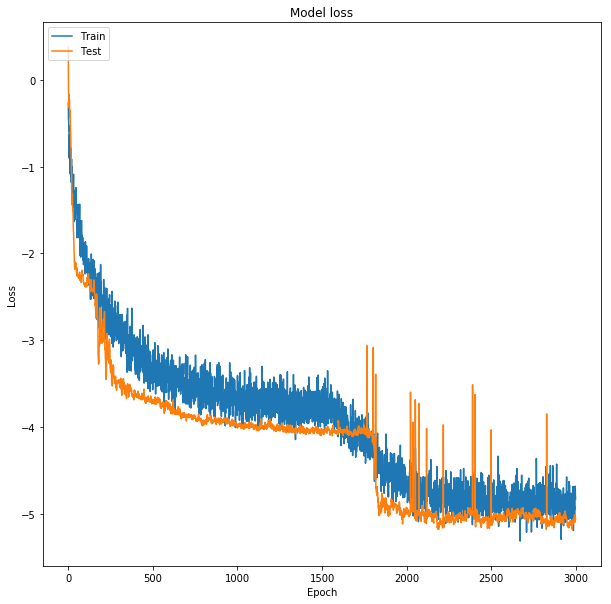

In [0]:
# Plot training & validation loss values
plt.figure(figsize=(10,10))
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5305e509e8>)

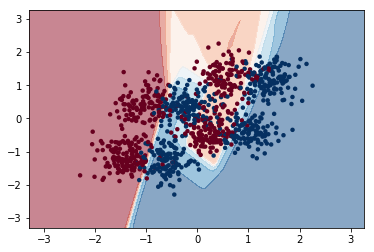

<Figure size 720x720 with 0 Axes>

In [0]:
plot_decision_boundary(X_tr, y_tr, model, cmap='RdBu')

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f53057516a0>)

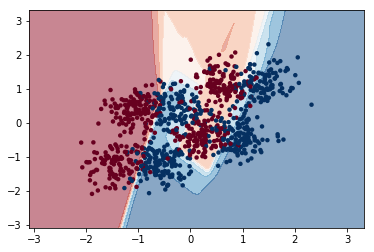

<Figure size 720x720 with 0 Axes>

In [0]:
plot_decision_boundary(X_te, y_te, model, cmap='RdBu')

In [0]:
y_pred2 = model2.predict(X_te, verbose=0)
pred2 = np.zeros((y_pred2.shape))

mask_1 = y_pred2 > 0
mask_2 = y_pred2 < 0

pred2[mask_1] = 1
pred2[mask_2] = -1

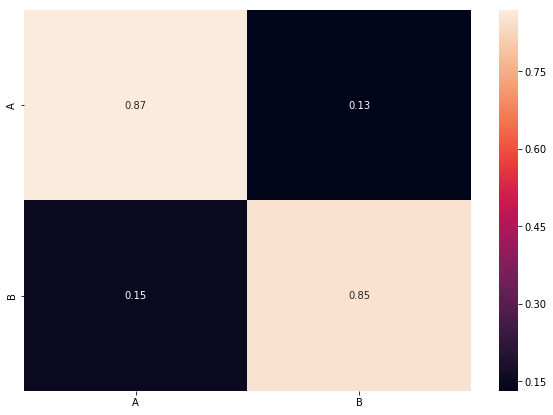

In [0]:
confusion2 = confusion_matrix(y_te, pred2)

df_cm2 = pd.DataFrame(confusion2, index = [i for i in "AB"],
                  columns = [i for i in "AB"])

df_cm_norm2 = df_cm2/df_cm2.sum(axis=1)

plt.figure(figsize = (10,7))
sn.heatmap(df_cm_norm2, annot=True)

#### Comentários acerca da mudança no número de neurônios 

A mudança das camadas do meio causou um impacto, ao nosso ver,  negativo, uma vez que não foi observado um tempo muito maior de computação do treino da rede, porém havendo uma piora na acurácia da rede em relação aos positivos, mas em relação aos negativos, temos uma estagnação na acurácia da classificação (compare as matrizes de confusão).
Além disso, foram feitos vários testes com mudanças grandes na arquitetura, com poucos neurônios de entrada ou mudança nas funções de ativação, esta é a arquitetura que melhor performa em ambos os casos. Notamos, por exemplo, que redes com dois neurônios na entrada performam como modelos lineares, com acurácias horríveis neste modelo não linear.
Pelo fato de ser uma classificação, testamos a função *softmax* como ativação da camada final, mas o modelo não convergiu.

### e) SVM

In [0]:
from sklearn import svm

In [0]:
clf = svm.SVC(kernel='rbf', C=1)

In [0]:
clf.fit(X_tr, y_tr)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
prediction = clf.predict(X_te)

In [0]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


No handles with labels found to put in legend.


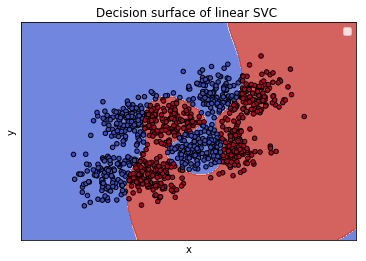

In [0]:
fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = X_te[:, 0], X_te[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=prediction, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

### f) Avaliação do SVM

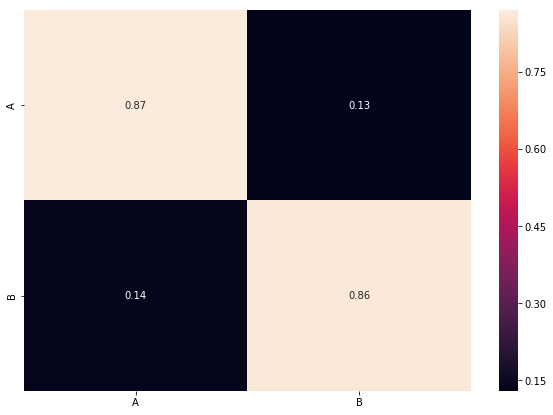

In [0]:
confusion_svm = confusion_matrix(y_te, prediction)

df_cm_svm = pd.DataFrame(confusion_svm, index = [i for i in "AB"],
                  columns = [i for i in "AB"])

df_cm_norm_svm = df_cm_svm/df_cm_svm.sum(axis=1)

plt.figure(figsize = (10,7))
sn.heatmap(df_cm_norm_svm, annot=True)

### g) Mudança em C  e reavaliação do SVM

In [0]:
new_clf = svm.SVC(kernel='rbf', C=500)
new_clf.fit(X_tr, y_tr)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=500, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
new_pred = new_clf.predict(X_te)

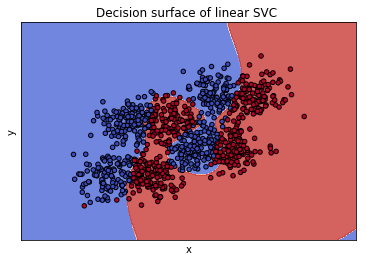

In [0]:
fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = X_te[:, 0], X_te[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=new_pred, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y')
ax.set_xlabel('x')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

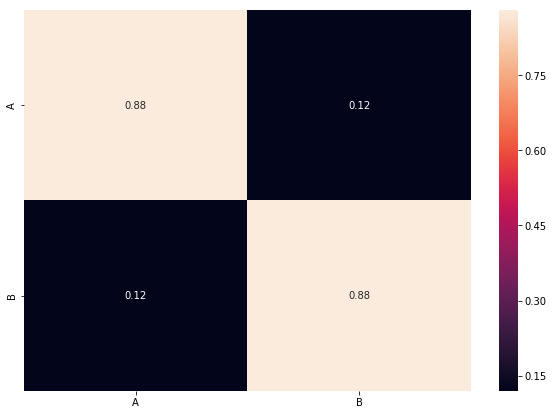

In [0]:
new_confusion_svm = confusion_matrix(y_te, new_pred)

new_df_cm_svm = pd.DataFrame(new_confusion_svm, index = [i for i in "AB"],
                  columns = [i for i in "AB"])

new_df_cm_norm_svm = new_df_cm_svm/new_df_cm_svm.sum(axis=1)

plt.figure(figsize = (10,7))
sn.heatmap(new_df_cm_norm_svm, annot=True)

Percebemos que a alteração no valor de C trouxe um aumento da capacidade de classificação dos valores positivos e negativos, muito por conta das bordas mais sucetíveis à curvas. Assumir C com o valor de 500 traz uma melhora significativa para o modelo, uma vez que não é observada uma demanda maior de computação para esta melhora de desempenho
